# Benchmark Comparison

The selected benchmark is the OpenCV library, that has built an algorithm for smile detection based on Haar Cascade . It does not exist a measure of the OpenCV Smile Detection algorithm using the CelebA Data Set, therefore, the researcher will compare the CNN model for smile detection and the OpenCV model using the test data set and compare the accuracy of both models.

In [1]:
#import libraries
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline

### 1. Define function to find smile using OpenCV

In [2]:
# define function to find smile using OpenCV
def find_smiles(filename, min_neigh, display=False):
    # frontal face detection
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

    # smile detection
    smile_cascade = cv2.CascadeClassifier("haarcascades/haarcascade_smile.xml")

    img = cv2.imread(filename)  

    # convert BGR image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # find faces in image
    faces = face_cascade.detectMultiScale(gray)

    
    num_smile = 0
    # Iterate over faces
    for (x, y, w, h) in faces: 
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # find smile in faces
        smile = smile_cascade.detectMultiScale(
            roi_gray,
            scaleFactor= 1.16,
            minNeighbors= min_neigh,
            minSize=(25, 25),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        # Iterate over the smiles found
        num_smile = len(smile)
        for (x2, y2, w2, h2) in smile:
            cv2.rectangle(roi_color, (x2, y2), (x2+w2, y2+h2), (255, 0, 0), 2)
            cv2.putText(img,'Smile',(x,y-7), 3, 1.2, (0, 255, 0), 2, cv2.LINE_AA)

    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # display the image, along with bounding box
    if display:
        print(num_smile)
        plt.grid(False)
        plt.imshow(cv_rgb)
        plt.show()
        
    return num_smile > 0

### Consideration

The Smile Detector based on Haar cascades can be highly impacted by the parameter <b>minNeighbors</b> that is the parameter specifying how many neighbors each candidate rectangle should have to retain it.

https://docs.opencv.org/3.4.1/d2/d99/tutorial_js_face_detection.html

Example of how the perfomance can be impacted.

1


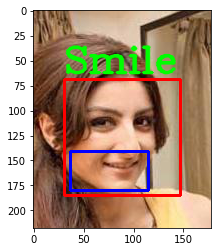

0


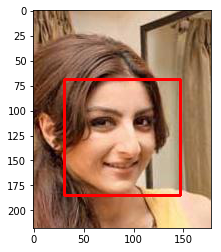

False

In [3]:
EXAMPLE_PIC = 'celeba-dataset/img_align_celeba/200868.jpg'
find_smiles(EXAMPLE_PIC, 5, True) #minNeighbors = 5
find_smiles(EXAMPLE_PIC, 6, True) #minNeighbors = 6

As shown in the example, changing the parameter from 5 to 6, changes the prediction.

In order to get the best possible solution of the Smile Detector based on Haar Cascades, the researcher will iterate using different values for <b>minNeighbors</b> and calculate the accuracy, the best accuracy will be the benchmark to compared with the developed model.

In [4]:
for k in range(1,20):

    # Negative class (not smiling) for test - 2500 images
    x = 0
    for i, j in enumerate(glob.glob("celeba-dataset/smile-test/0/*.jpg")):
        if not(find_smiles(j.replace('\\','/'), k, False)):
            x += 1

    # Negative class (not smiling) for test - 2500 images
    y = 0
    for i, j in enumerate(glob.glob("celeba-dataset/smile-test/1/*.jpg")):
        if find_smiles(j.replace('\\','/'), k, False):
            y += 1
    print('\nIteration', k)
    print('x=', x, '| y=', y)
    print('minNeighbors:', k, '- Accuracy:', (x + y)/5000 )


Iteration 1
x= 786 | y= 2383
minNeighbors: 1 - Accuracy: 0.6338

Iteration 2
x= 1024 | y= 2350
minNeighbors: 2 - Accuracy: 0.6748

Iteration 3
x= 1199 | y= 2322
minNeighbors: 3 - Accuracy: 0.7042

Iteration 4
x= 1346 | y= 2308
minNeighbors: 4 - Accuracy: 0.7308

Iteration 5
x= 1468 | y= 2276
minNeighbors: 5 - Accuracy: 0.7488

Iteration 6
x= 1576 | y= 2258
minNeighbors: 6 - Accuracy: 0.7668

Iteration 7
x= 1678 | y= 2224
minNeighbors: 7 - Accuracy: 0.7804

Iteration 8
x= 1760 | y= 2194
minNeighbors: 8 - Accuracy: 0.7908

Iteration 9
x= 1835 | y= 2157
minNeighbors: 9 - Accuracy: 0.7984

Iteration 10
x= 1892 | y= 2119
minNeighbors: 10 - Accuracy: 0.8022

Iteration 11
x= 1942 | y= 2094
minNeighbors: 11 - Accuracy: 0.8072

Iteration 12
x= 2004 | y= 2061
minNeighbors: 12 - Accuracy: 0.813

Iteration 13
x= 2058 | y= 2020
minNeighbors: 13 - Accuracy: 0.8156

Iteration 14
x= 2093 | y= 1984
minNeighbors: 14 - Accuracy: 0.8154

Iteration 15
x= 2140 | y= 1950
minNeighbors: 15 - Accuracy: 0.818



The best model for smile detector using Haar Cascades have an accuracy of 81.98%, which is the beachmark.

The model based on transfer learning has an accuracy of 91.37%.

### Veredict: 

The trained model has better perfomance than the benchamark.

OpenCV library has a very good Face Detector, but is not the same case for smile detector, where the algorithm